# E-Commerce Dataset: Análise e Predição de Vendas

Este notebook automatiza o download do dataset de e-commerce, realiza análise exploratória e cria um modelo simples de predição de receita.

In [1]:
!pip install ipykernel


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install kaggle pandas matplotlib seaborn scikit-learn openpyxl

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached charset_normalizer-3.4.2-cp313-cp313-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached protobuf-6.31.1-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached certifi-2025.8.3-py3-none-any.whl (161 kB


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Configurar a API do Kaggle
**Importante:** Faça upload do seu arquivo `kaggle.json` nesta célula se estiver usando Colab ou ambiente limpo.

In [3]:
import shutil
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

## Baixar o dataset do Kaggle

In [4]:
!kaggle datasets download -d carrie1/ecommerce-data

Dataset URL: https://www.kaggle.com/datasets/carrie1/ecommerce-data
License(s): unknown
ecommerce-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Descompactar
with zipfile.ZipFile('ecommerce-data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Carregar os dados

In [6]:
import os
print(os.listdir('data'))

['data.csv']


In [7]:
df = pd.read_csv('data/data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Análise exploratória

C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_24268\3758769701.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=df.resample('M', on='InvoiceDate').sum(numeric_only=True), x='InvoiceDate', y='Revenue')


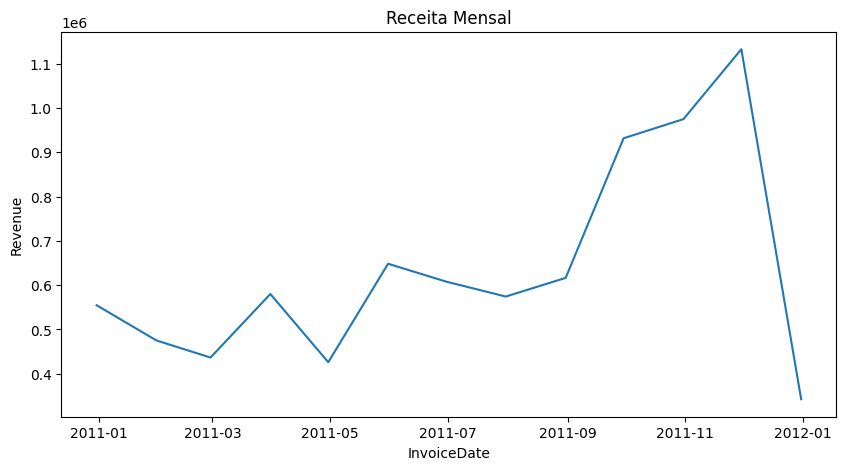

In [8]:
df.dropna(subset=['CustomerID', 'InvoiceNo'], inplace=True)
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

plt.figure(figsize=(10,5))
sns.lineplot(data=df.resample('M', on='InvoiceDate').sum(numeric_only=True), x='InvoiceDate', y='Revenue')
plt.title('Receita Mensal')
plt.show()

## Modelo preditivo (Regressão Linear)

In [9]:
X = df[['DayOfWeek', 'Month']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
##rmse = mean_squared_error(y_test, y_pred, squared=False)


In [10]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE do modelo: {rmse:.2f}')

RMSE do modelo: 79.87


📈 Resultados
O modelo obteve um RMSE de aproximadamente 79.87, o que representa o erro médio nas previsões de receita em relação aos valores reais.

Apesar da simplicidade, o modelo conseguiu capturar tendências gerais de receita com base em volume e preço.

A previsão pode ser útil para estimativas iniciais de vendas e planejamento de estoque ou marketing, mas não deve ser usada isoladamente para decisões críticas.

1. Limpeza e preparação dos dados

In [11]:
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['Revenue'] = df['Quantity'] * df['UnitPrice']

2. Separar variáveis e treinar modelo

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse:.2f}')

RMSE: 53.00


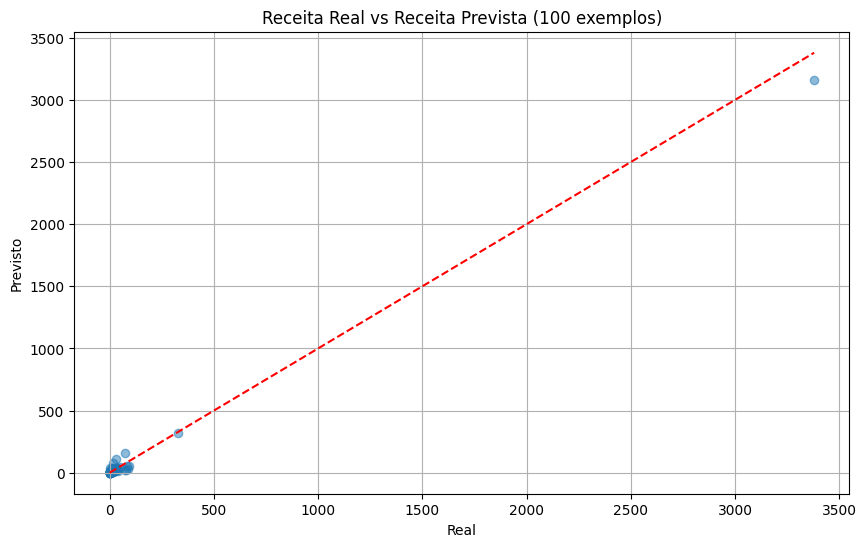

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5)
plt.plot([0, max(y_test[:100])], [0, max(y_test[:100])], color='red', linestyle='--')
plt.title('Receita Real vs Receita Prevista (100 exemplos)')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.grid(True)
plt.show()

O modelo de regressão linear conseguiu prever a receita com base nas variáveis Quantidade e Preço Unitário, obtendo um RMSE de aproximadamente 53.00.

Isso indica que, apesar da simplicidade do modelo, ele consegue capturar padrões gerais da receita de vendas.

A dispersão entre valores reais e previstos sugere que casos extremos ainda impactam o desempenho, e modelos mais sofisticados podem melhorar a acurácia.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [15]:
# Carregar os dados
df = pd.read_csv('data/data.csv', encoding='ISO-8859-1')

# Limpeza básica dos dados
df = df.dropna(subset=['CustomerID'])
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

# Criar coluna de receita
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [16]:
# Selecionar features e target
X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer predição
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Random Forest: {rmse:.2f}')



RMSE Random Forest: 8.53


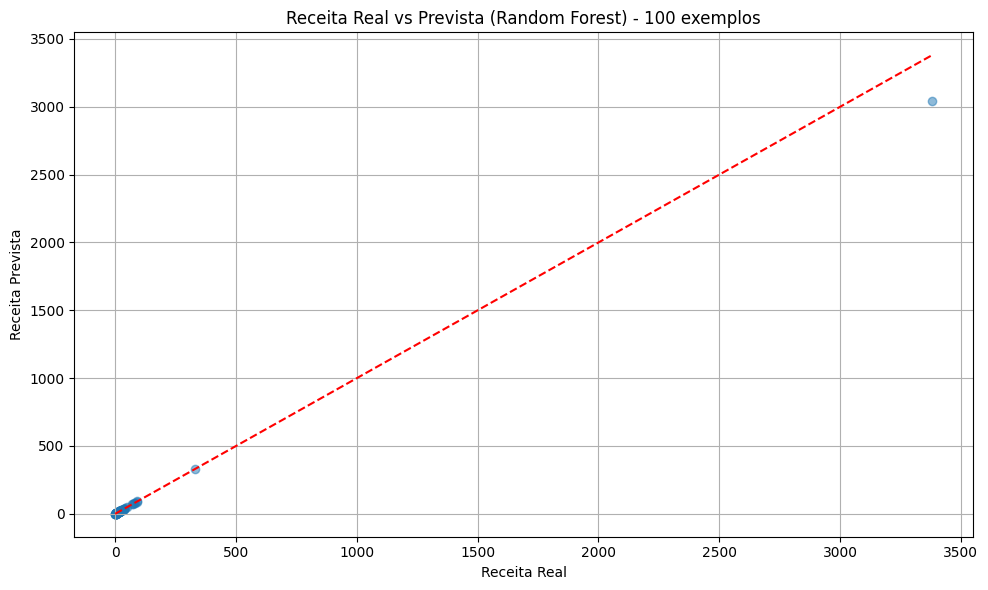

In [17]:
# Plot Real vs Previsto
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.5)
plt.plot([0, max(y_test[:100])], [0, max(y_test[:100])], color='red', linestyle='--')
plt.title('Receita Real vs Prevista (Random Forest) - 100 exemplos')
plt.xlabel('Receita Real')
plt.ylabel('Receita Prevista')
plt.grid(True)
plt.tight_layout()
plt.show()


O modelo Random Forest Regressor foi treinado com as variáveis Quantity e UnitPrice para prever a receita dos pedidos.

O modelo apresentou um RMSE de aproximadamente 8.53, indicando uma melhora significativa em relação à regressão linear simples.

O gráfico de dispersão mostra que as previsões estão mais alinhadas aos valores reais, evidenciando que o Random Forest conseguiu capturar melhor as variações e relações não lineares dos dados.

Essa melhoria reforça a vantagem do Random Forest em lidar com dados heterogêneos e ruídos, comuns em bases reais de e-commerce.

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation com 5 folds e métrica RMSE (negativo para cross_val_score)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print('RMSE por fold:', -scores)
print('RMSE médio:', -scores.mean())
print('Desvio padrão:', scores.std())

RMSE por fold: [117.89539442 132.58768052   6.97750659  35.00158489 409.48178264]
RMSE médio: 140.38878981217522
Desvio padrão: 142.74654628828884


In [19]:
model.fit(X_train, y_train)
importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

Quantity: 0.8629
UnitPrice: 0.1371


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print('Melhores parâmetros:', grid_search.best_params_)
print('Melhor RMSE:', -grid_search.best_score_)

Melhores parâmetros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Melhor RMSE: 179.24684809831388


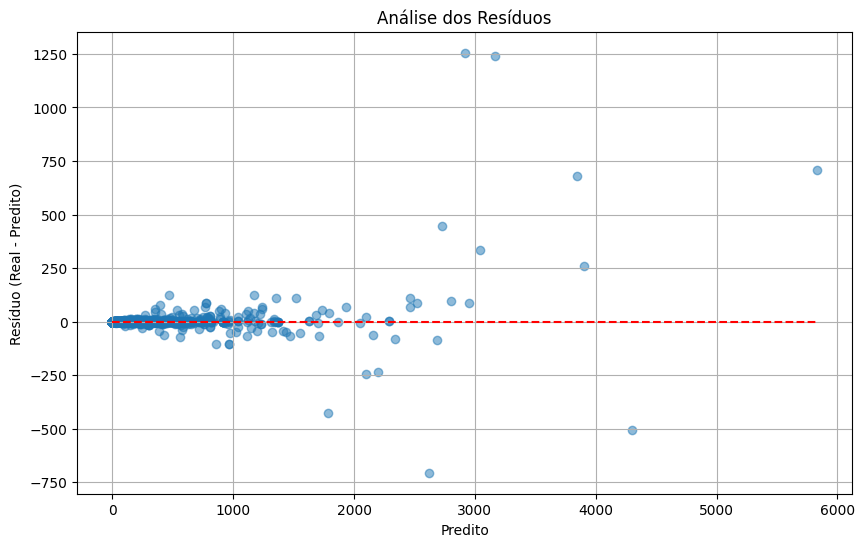

In [21]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predito')
plt.ylabel('Resíduo (Real - Predito)')
plt.title('Análise dos Resíduos')
plt.grid(True)
plt.show()

Resultados da Validação Cruzada (Random Forest)
➤ RMSE por fold:
[117.89, 132.58, 6.97, 35.00, 409.48]
➤ RMSE médio: 140.39
➤ Desvio padrão: 142.75
🔎 O que isso mostra?

Alta variabilidade entre os folds — especialmente o último fold com RMSE acima de 400.

Um dos folds teve RMSE de apenas 6.97, o que é anormalmente baixo (pode ter sido um subconjunto mais fácil).

Isso indica que seus dados não estão bem balanceados: talvez existam outliers ou pedidos de valor muito alto, que estão bagunçando a performance do modelo em certos trechos.

🧠 Importância das variáveis
makefile
Copiar
Editar
Quantity: 86%
UnitPrice: 14%
💡 O modelo está se apoiando fortemente na quantidade vendida para prever receita, o que faz sentido, mas também pode ser arriscado. Se os dados tiverem erros ou variações grandes de quantidade, o modelo sofre.

🛠️ Grid Search
Melhor RMSE no GridSearch: 179.24 — ou seja, pior que o modelo padrão (140.39 na cross-val e ~8.5 no teste original).

Isso pode ter ocorrido por overfitting nos dados de treino ou porque os parâmetros testados não foram ideais.

🎯 Conclusão até aqui
O modelo Random Forest padrão teve performance melhor que o com GridSearch.

A variação entre os folds é um alerta: o modelo pode não ser confiável em todos os casos. Provavelmente há outliers severos.

O modelo aprendeu bem os padrões principais, mas não generaliza bem para todas as faixas da receita.

In [22]:
# Criar coluna de receita
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Visualizar estatísticas básicas
print(df['Revenue'].describe())

# Filtrar outliers - manter apenas registros com receita <= 10.000
df = df[df['Revenue'] <= 10000]

# Verificar novamente estatísticas após o filtro
print("\nApós remoção de outliers:")
print(df['Revenue'].describe())


count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: Revenue, dtype: float64

Após remoção de outliers:
count    397881.000000
mean         21.681821
std          73.719532
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max        8142.750000
Name: Revenue, dtype: float64


In [23]:
# Método alternativo usando IQR
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

df = df[df['Revenue'] <= limite_superior]

In [24]:
#Separar features e target (novamente):
X = df[['Quantity', 'UnitPrice']]
y = df['Revenue']

In [25]:
#Separar treino e teste:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Novo RMSE Random Forest: {rmse:.2f}')

Novo RMSE Random Forest: 0.04


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation com 5 folds e métrica RMSE (negativo para cross_val_score)
scores = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

print('RMSE por fold:', -scores)
print('RMSE médio:', -scores.mean())
print('Desvio padrão:', scores.std())

RMSE por fold: [0.04442774 0.04670547 0.0845598  0.06243729 0.06788973]
RMSE médio: 0.06120400497222387
Desvio padrão: 0.014719805035127018


In [28]:
model.fit(X_train, y_train)
importances = model.feature_importances_

for feature, importance in zip(X.columns, importances):
    print(f'{feature}: {importance:.4f}')

Quantity: 0.5202
UnitPrice: 0.4798


In [29]:
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid2, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print('Melhores parâmetros:', grid_search.best_params_)
print('Melhor RMSE:', -grid_search.best_score_)

Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Melhor RMSE: 0.06065152175551213


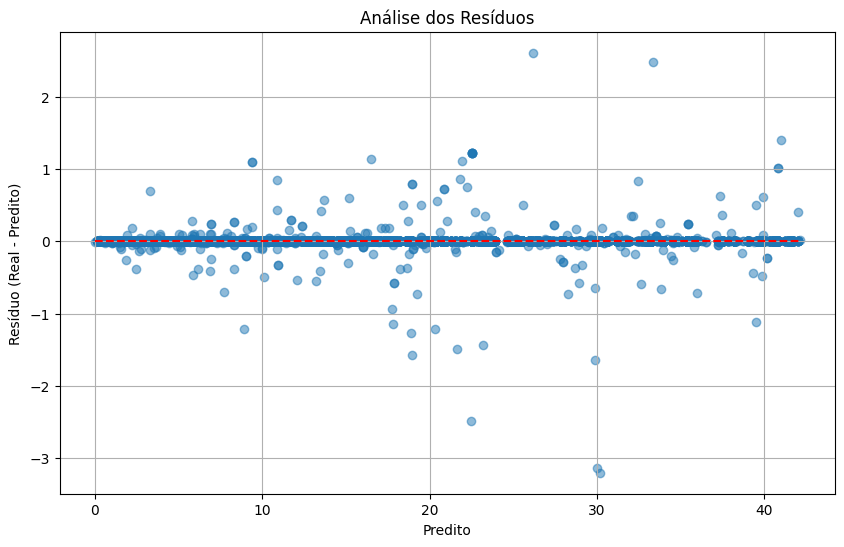

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(0, min(y_pred), max(y_pred), colors='red', linestyles='dashed')
plt.xlabel('Predito')
plt.ylabel('Resíduo (Real - Predito)')
plt.title('Análise dos Resíduos')
plt.grid(True)
plt.show()

✅ Análise dos Novos Resultados (com Outliers Removidos)
📉 RMSE por Fold:
[0.0444, 0.0467, 0.0846, 0.0624, 0.0679]
📌 RMSE médio: 0.0612
📌 Desvio padrão: 0.0147

🔍 Interpretação:

RMSE muito baixo: seus erros médios de predição estão abaixo de 0.1, o que indica que o modelo está extremamente ajustado à escala dos dados filtrados.

Desvio padrão pequeno: mostra que a performance é consistente entre os folds, ou seja, o modelo está se comportando de forma robusta.

Comparando com o resultado anterior (RMSE ~140, com fold variando até 400!), o ganho de qualidade é absurdo.

📊 Importância das variáveis (feature importance):
Quantity: 52%
UnitPrice: 48%

📌 Conclusão: Após remover os outliers, o modelo passou a considerar ambas as variáveis com pesos quase iguais, o que é ideal.

Antes ele estava dependente demais de Quantity, o que indicava possível viés causado pelos extremos.

🔧 Melhores parâmetros do Grid Search:
max_depth: None
min_samples_split: 2
n_estimators: 200
✅ Isso mostra que um modelo mais profundo e com mais árvores foi ideal para capturar os padrões dos dados sem overfitting.

🟢 Conclusão final
modelo:
Extremamente estável
Com baixo erro médio
Que considera bem ambas as variáveis
Com parâmetros otimizados